In [3]:
import opendatasets as od

In [4]:
dataset_url='https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset'

In [5]:
od.download(dataset_url)

100%|██████████| 2.70G/2.70G [01:36<00:00, 30.1MB/s]


In [6]:
import os
import numpy as np
import pandas as pd

import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import DataLoader
from PIL import Image
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
from torchsummary import summary

%matplotlib inline

In [14]:
data_dir = "./new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)

In [15]:
print(diseases)

['Apple___Cedar_apple_rust', 'Tomato___Leaf_Mold', 'Potato___Late_blight', 'Grape___Black_rot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Cherry_(including_sour)___healthy', 'Potato___Early_blight', 'Raspberry___healthy', 'Tomato___Bacterial_spot', 'Blueberry___healthy', 'Peach___healthy', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___Apple_scab', 'Pepper,_bell___healthy', 'Grape___Esca_(Black_Measles)', 'Apple___Black_rot', 'Peach___Bacterial_spot', 'Grape___healthy', 'Squash___Powdery_mildew', 'Soybean___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Common_rust_', 'Pepper,_bell___Bacterial_spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Late_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___healthy', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Bligh

In [16]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 38


In [17]:
plants = []
NumberOfDiseases = 0

for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1


In [18]:
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Apple', 'Tomato', 'Potato', 'Grape', 'Cherry_(including_sour)', 'Raspberry', 'Blueberry', 'Peach', 'Pepper,_bell', 'Squash', 'Soybean', 'Corn_(maize)', 'Strawberry', 'Orange']


In [19]:
print("Number of plants: {}".format(len(plants)))

Number of plants: 14


In [20]:
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 26


In [21]:
nums = {}

for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + "/" + disease))

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])

In [22]:
img_per_class

no. of images
Apple___Cedar_apple_rust                                     1760
Tomato___Leaf_Mold                                           1882
Potato___Late_blight                                         1939
Grape___Black_rot                                            1888
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961
Cherry_(including_sour)___healthy                            1826
Potato___Early_blight                                        1939
Raspberry___healthy                                          1781
Tomato___Bacterial_spot                                      1702
Blueberry___healthy                                          1816
Peach___healthy                                              1728
Tomato___Target_Spot                                         1827
Tomato___Tomato_mosaic_virus                                 1790
Apple___healthy                                              2008
Cherry_(including_sour)___Powdery_mildew                     1683
Apple___Apple_scab                                           2016
Pepper,_bell___healthy                                       1988
Grape___Esca_(Black_Measles)                                 1920
Apple___Black_rot                                            1987
Peach___Bacterial_spot                                       1838
Grape___healthy                                              1692
Squash___Powdery_mildew                                      1736
Soybean___healthy                                            2022
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Tomato___Septoria_leaf_spot                                  1745
Corn_(maize)___Common_rust_                                  1907
Pepper,_bell___Bacterial_spot                                1913
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Strawberry___Leaf_scorch                                     1774
Strawberry___healthy                                         1824
Tomato___Late_blight                                         1851
Tomato___Spider_mites Two-spotted_spider_mite                1741
Tomato___healthy                                             1926
Potato___healthy                                             1824
Corn_(maize)___Northern_Leaf_Blight                          1908
Corn_(maize)___healthy                                       1859
Tomato___Early_blight                                        1920
Orange___Haunglongbing_(Citrus_greening)                     2010

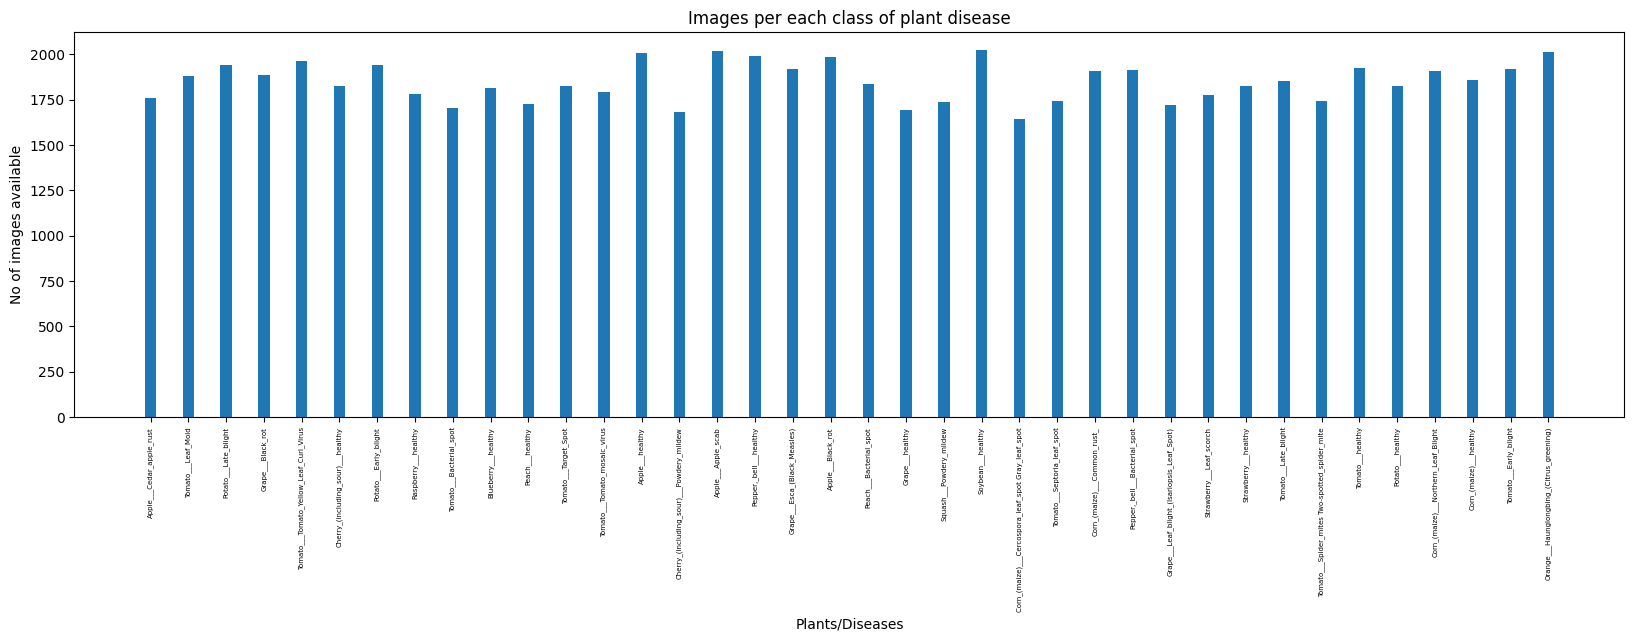

In [24]:
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel("Plants/Diseases", fontsize=10)
plt.ylabel("No of images available", fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title("Images per each class of plant disease")
plt.show()

In [25]:
n_train = 0

for value in nums.values():
    n_train += value

print(f"There are {n_train} images for training")

There are 70295 images for training


In [26]:
train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor())

In [30]:
train[0]

(tensor([[[0.6549, 0.6510, 0.6471,  ..., 0.7255, 0.7176, 0.7098],
          [0.6667, 0.6627, 0.6588,  ..., 0.7294, 0.7216, 0.7176],
          [0.6667, 0.6627, 0.6588,  ..., 0.7373, 0.7294, 0.7255],
          ...,
          [0.3922, 0.4000, 0.4078,  ..., 0.4941, 0.4941, 0.4941],
          [0.3961, 0.4000, 0.4039,  ..., 0.4784, 0.4824, 0.4824],
          [0.4078, 0.4039, 0.4000,  ..., 0.4745, 0.4784, 0.4824]],
 
         [[0.6392, 0.6353, 0.6314,  ..., 0.7137, 0.7059, 0.6980],
          [0.6510, 0.6471, 0.6431,  ..., 0.7176, 0.7098, 0.7059],
          [0.6510, 0.6471, 0.6431,  ..., 0.7255, 0.7176, 0.7137],
          ...,
          [0.3529, 0.3608, 0.3686,  ..., 0.4314, 0.4314, 0.4314],
          [0.3569, 0.3608, 0.3647,  ..., 0.4157, 0.4196, 0.4196],
          [0.3686, 0.3647, 0.3608,  ..., 0.4118, 0.4157, 0.4196]],
 
         [[0.7686, 0.7647, 0.7608,  ..., 0.8275, 0.8196, 0.8118],
          [0.7804, 0.7765, 0.7725,  ..., 0.8314, 0.8235, 0.8196],
          [0.7804, 0.7765, 0.7725,  ...,

In [27]:
img, label = train[0]

In [28]:
print(img.shape, label)

torch.Size([3, 256, 256]) 0


In [31]:
len(train.classes)

38

In [47]:
%matplotlib inline

In [55]:
def show_image(image, label):
    print("Label: " + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))
    plt.show()

In [56]:
show_image(*train[0])

Label: Apple___Apple_scab(0)


Label: Tomato___healthy(37)


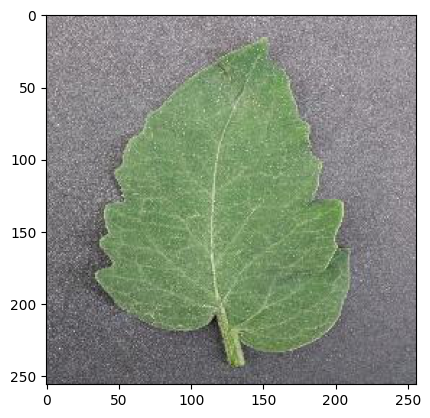

In [57]:
show_image(*train[70000])

Label: Peach___Bacterial_spot(16)


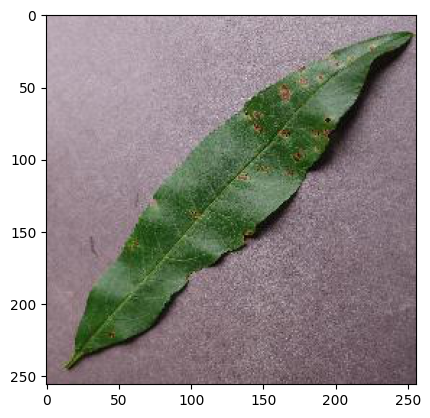

In [58]:
show_image(*train[30000])

In [59]:
random_seed = 7
torch.manual_seed(random_seed)

In [60]:
batch_size = 32

In [61]:
train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

In [62]:
def show_batch(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

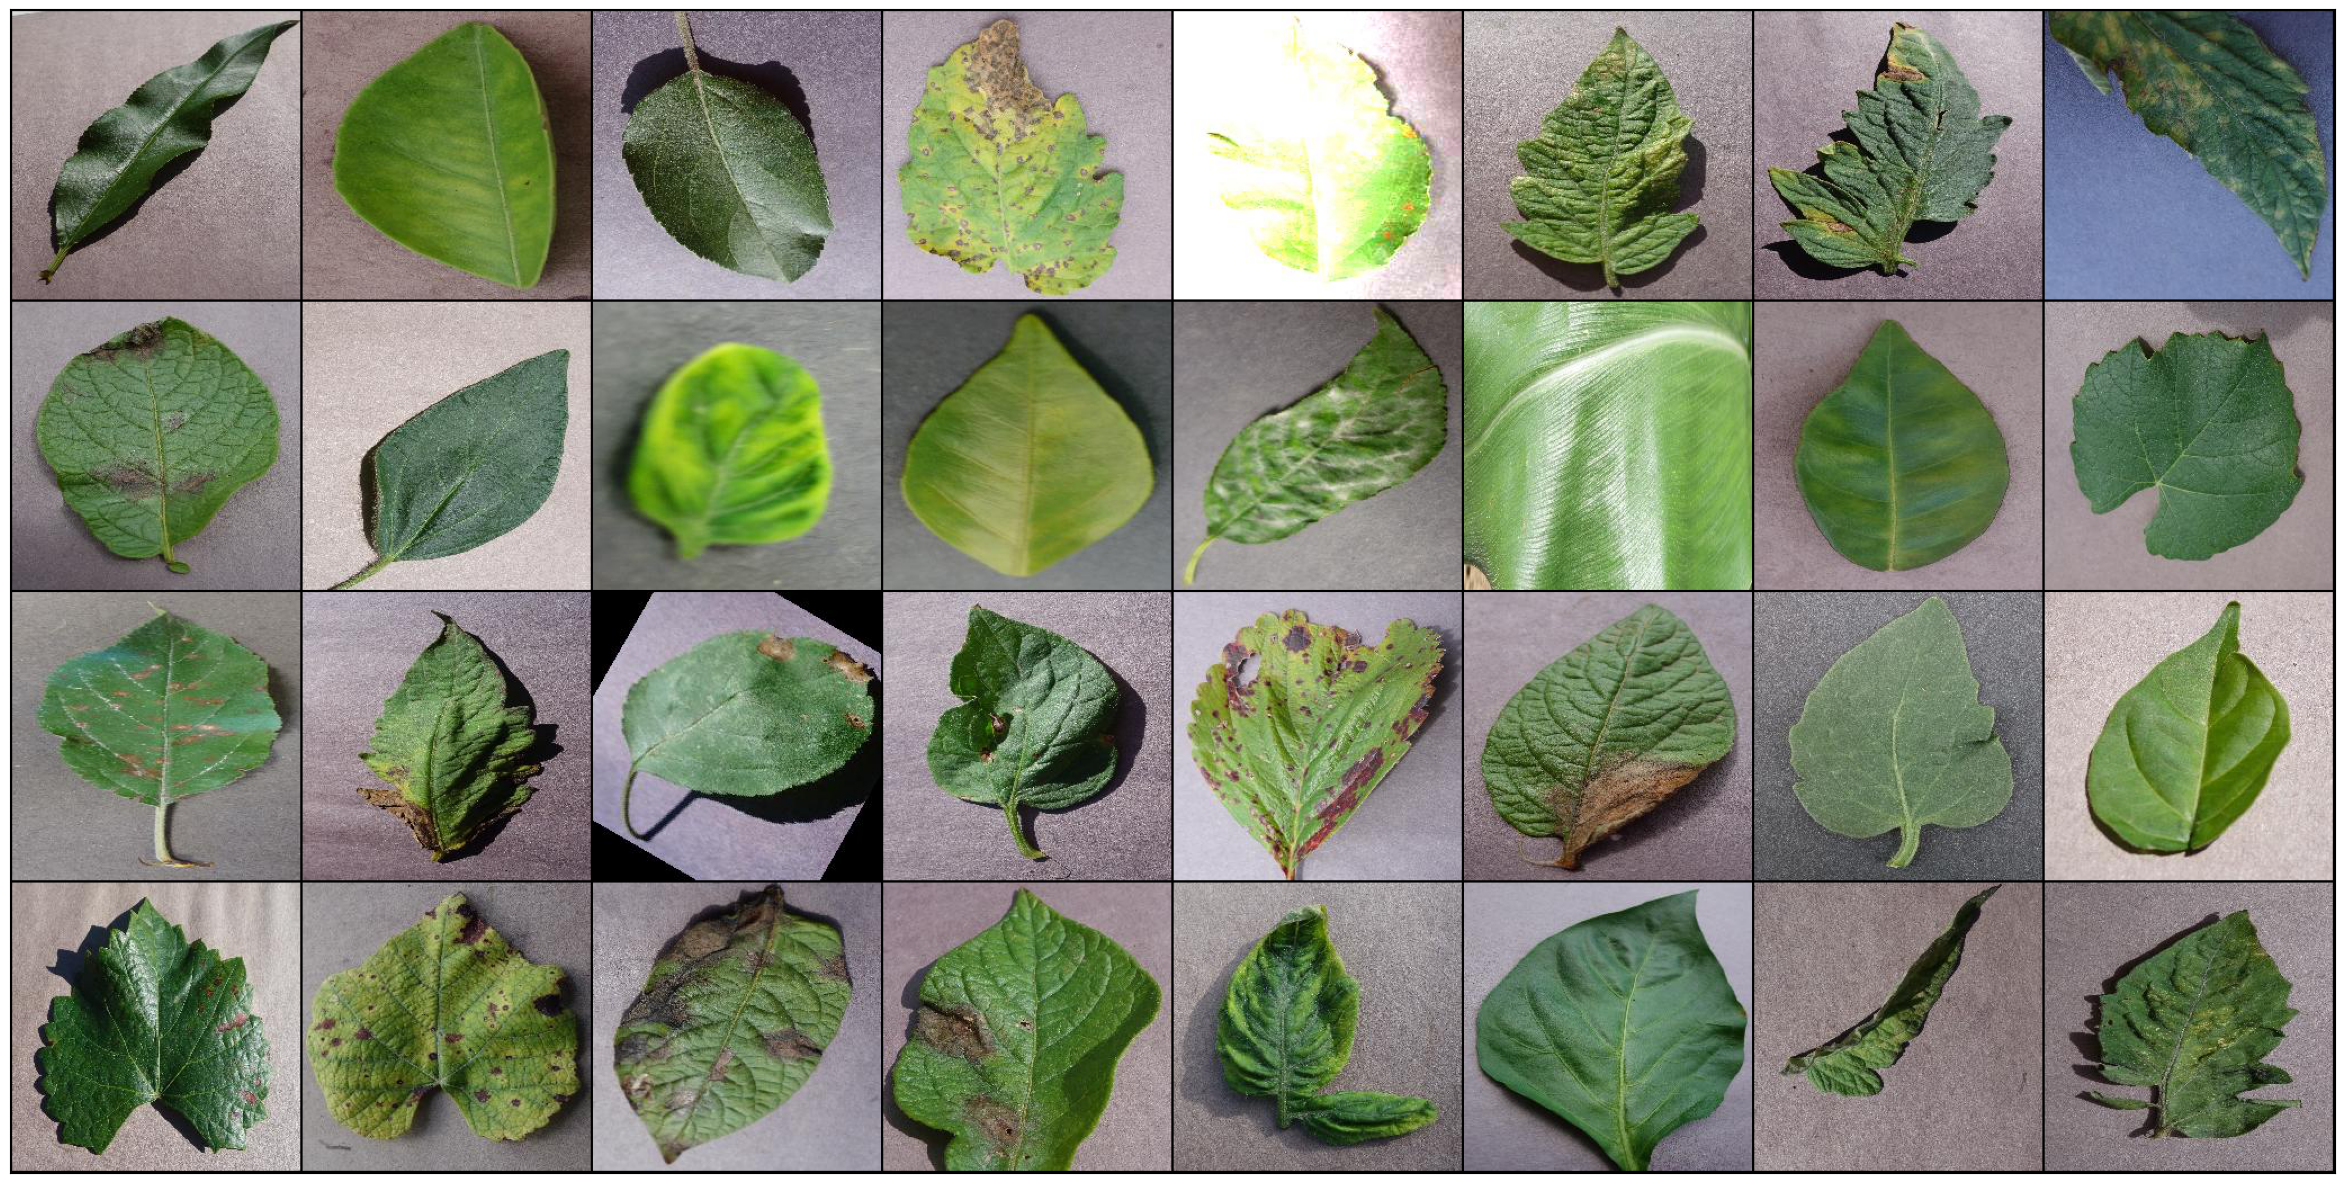

In [63]:
show_batch(train_dl)

In [64]:
def get_default_device():
    if torch.cuda.is_available:
        return torch.device("cuda")
    else:
        return torch.device("cpu")

In [65]:
def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    
    return data.to(device, non_blocking=True)

In [66]:
class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)
        
    def __len__(self):
        return len(self.dl)

In [67]:
device = get_default_device()

In [68]:
device

device(type='cuda')

In [69]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [70]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)

        return self.relu2(out) + x

In [71]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)

    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [72]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)

        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)

        return {"val_loss": loss.detach(), "val_accuracy": acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        batch_accuracy = [x["val_accuracy"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        epoch_accuracy = torch.stack(batch_accuracy).mean()

        return {"val_loss": epoch_loss, "val_accuracy": epoch_accuracy}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(\
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_accuracy']))

In [73]:
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
              nn.BatchNorm2d(out_channels),
              nn.ReLU(inplace=True)]
    
    if pool:
        layers.append(nn.MaxPool2d(4))

    return nn.Sequential(*layers)

In [74]:
class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()

        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True)
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))

        self.conv3 = ConvBlock(128, 256, pool=True)
        self.conv4 = ConvBlock(256, 512, pool=True)
        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))

        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                        nn.Flatten(),
                                        nn.Linear(512, num_diseases))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)

        return out

In [75]:
model = to_device(ResNet9(3, len(train.classes)), device)

In [76]:
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [77]:
INPUT_SHAPE = (3, 256, 256)

print(summary(model.cuda(), (INPUT_SHAPE)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
            Conv2d-4        [-1, 128, 256, 256]          73,856
       BatchNorm2d-5        [-1, 128, 256, 256]             256
              ReLU-6        [-1, 128, 256, 256]               0
         MaxPool2d-7          [-1, 128, 64, 64]               0
            Conv2d-8          [-1, 128, 64, 64]         147,584
       BatchNorm2d-9          [-1, 128, 64, 64]             256
             ReLU-10          [-1, 128, 64, 64]               0
           Conv2d-11          [-1, 128, 64, 64]         147,584
      BatchNorm2d-12          [-1, 128, 64, 64]             256
             ReLU-13          [-1, 128, 64, 64]               0
           Conv2d-14          [-1, 256,

In [78]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]

    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    
def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0,
                 grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    optimizer = opt_func(model.parameters(), max_lr, weight_decay = weight_decay)
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))

    for epoch in range(epochs):
        model.train()
        train_losses = []
        lrs = []

        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            lrs.append(get_lr(optimizer))
            sched.step()

        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs

        model.epoch_end(epoch, result)
        history.append(result)

    
    return history

In [79]:
%%time
history = [evaluate(model, valid_dl)]
history

CPU times: user 25.4 s, sys: 2.64 s, total: 28 s
Wall time: 23.1 s


[{'val_loss': tensor(3.6378, device='cuda:0'), 'val_accuracy': tensor(0.0282)}]

In [80]:
epochs = 2
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [81]:
%%time
history += fit_OneCycle(epochs, max_lr, model, train_dl, valid_dl, \
    grad_clip=grad_clip,
    weight_decay=1e-4,
    opt_func=opt_func)

Epoch [0], last_lr: 0.00812, train_loss: 0.7499, val_loss: 0.4162, val_acc: 0.8782
Epoch [1], last_lr: 0.00000, train_loss: 0.1254, val_loss: 0.0268, val_acc: 0.9923
CPU times: user 5min 14s, sys: 5min 4s, total: 10min 18s
Wall time: 9min 30s


In [134]:
def plot_accuracies(history):
    accuracies = [x['val_accuracy'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')

def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    val_losses = [i.cpu() for i in val_losses]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')

def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.')

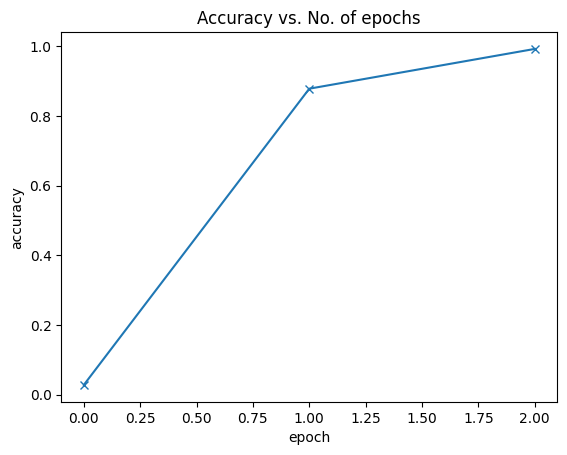

In [138]:
plot_accuracies(history)

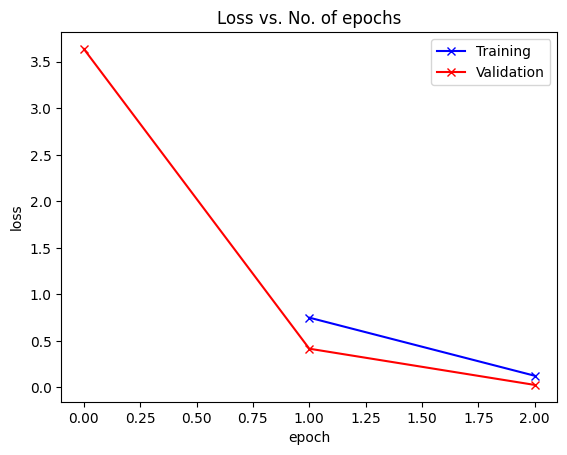

In [136]:
plot_losses(history)

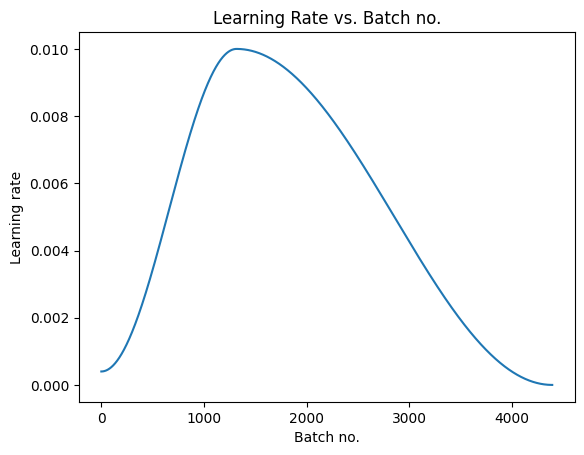

In [137]:
plot_lrs(history)

In [139]:
test_dir = "./new-plant-diseases-dataset/test"
test = ImageFolder(test_dir, transform=transforms.ToTensor())

In [140]:
test_images = sorted(os.listdir(test_dir + "/test"))

In [141]:
test_images

['AppleCedarRust1.JPG',
 'AppleCedarRust2.JPG',
 'AppleCedarRust3.JPG',
 'AppleCedarRust4.JPG',
 'AppleScab1.JPG',
 'AppleScab2.JPG',
 'AppleScab3.JPG',
 'CornCommonRust1.JPG',
 'CornCommonRust2.JPG',
 'CornCommonRust3.JPG',
 'PotatoEarlyBlight1.JPG',
 'PotatoEarlyBlight2.JPG',
 'PotatoEarlyBlight3.JPG',
 'PotatoEarlyBlight4.JPG',
 'PotatoEarlyBlight5.JPG',
 'PotatoHealthy1.JPG',
 'PotatoHealthy2.JPG',
 'TomatoEarlyBlight1.JPG',
 'TomatoEarlyBlight2.JPG',
 'TomatoEarlyBlight3.JPG',
 'TomatoEarlyBlight4.JPG',
 'TomatoEarlyBlight5.JPG',
 'TomatoEarlyBlight6.JPG',
 'TomatoHealthy1.JPG',
 'TomatoHealthy2.JPG',
 'TomatoHealthy3.JPG',
 'TomatoHealthy4.JPG',
 'TomatoYellowCurlVirus1.JPG',
 'TomatoYellowCurlVirus2.JPG',
 'TomatoYellowCurlVirus3.JPG',
 'TomatoYellowCurlVirus4.JPG',
 'TomatoYellowCurlVirus5.JPG',
 'TomatoYellowCurlVirus6.JPG']

In [142]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)

    return train.classes[preds[0].item()]


Label:  AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust


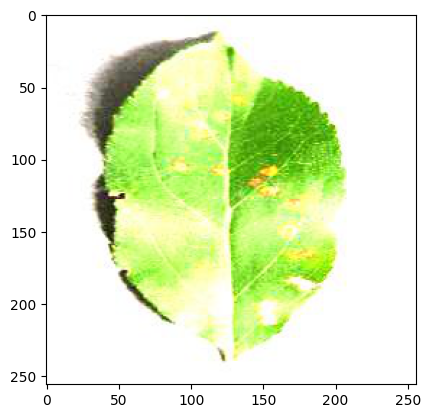

In [143]:
img, label = test[0]
plt.imshow(img.permute(1, 2, 0))

print('Label: ', test_images[0], ', Predicted:', predict_image(img, model))